Python → MySQL Connection

In [2]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Dhruv@2001",
    database="house_price_db"
)

query = "SELECT * FROM house_prices"
df = pd.read_sql(query, conn)

df.head()


C:\Users\DHRUV\AppData\Local\Temp\ipykernel_18596\708105626.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


EDA Code

              LotArea  TotalBsmtSF  YearBuilt  SalePrice
LotArea      1.000000     0.254316   0.024128   0.162122
TotalBsmtSF  0.254316     1.000000   0.408750   0.239180
YearBuilt    0.024128     0.408750   1.000000   0.193449
SalePrice    0.162122     0.239180   0.193449   1.000000


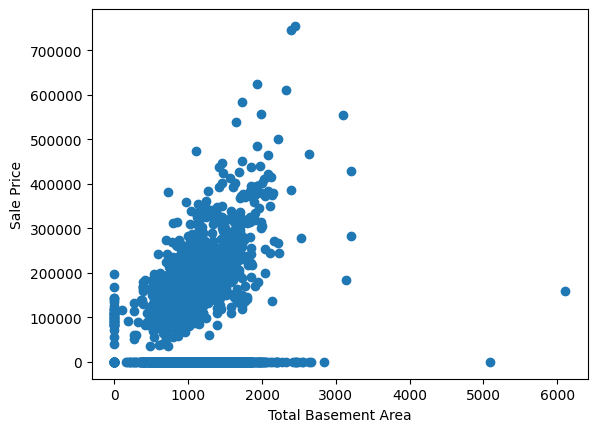

In [3]:
import matplotlib.pyplot as plt

# Correlation
print(df[['LotArea','TotalBsmtSF','YearBuilt','SalePrice']].corr())

# Price vs Basement
plt.scatter(df['TotalBsmtSF'], df['SalePrice'])
plt.xlabel("Total Basement Area")
plt.ylabel("Sale Price")
plt.show()


PREDICTIVE MODEL (LINEAR REGRESSION)

In [4]:
df = df.dropna()

X = df[['LotArea','OverallCond','YearBuilt','TotalBsmtSF']]
y = df['SalePrice']


Train & Validate Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2:.3f}")



R2 Score: 0.103


 Save Predictions 

In [ ]:
df_test = X_test.copy()
df_test['ActualPrice'] = y_test
df_test['PredictedPrice'] = y_pred

df_test.to_csv("house_price_predictions.csv", index=False)